connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.getcwd()

Mounted at /content/gdrive


'/content'

# FSNumber zscore: One-way Repeated Measure ANOVA

## Read in and visualize data

In [ ]:
import numpy as np
import pandas as pd
# load data file
df = pd.read_csv('/content/gdrive/MyDrive/DataColab/FSNumber_4hf_zScore_wide.csv')
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'])
# replace column names
df_melt.columns = ['Id', 'time_points', 'FS_Number']	
df_melt.head(10)

,Id,time_points,FS_Number
0,S1,D1,-0.623111
1,S2,D1,0.654187
2,S3,D1,0.106303
3,S4,D1,-0.766109
4,S5,D1,0.993230
5,S6,D1,-0.140196
6,S1,D2,-0.055212
7,S2,D2,-0.479737
8,S3,D2,1.671849
9,S4,D2,1.597884


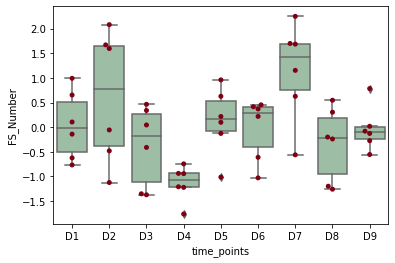

In [ ]:
# generate a boxplot to see the data distribution by time points. Using boxplot, we can 
# boxplot helps detect the differences between different time points and find any outliers
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='time_points', y='FS_Number', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="time_points", y="FS_Number", data=df_melt, color='#7d0013')
plt.show()

# Perform one-way repeated measure ANOVA

In [ ]:
# install pingouin as !pip install pingouin
!pip install pingouin
import pingouin as pg
res = pg.rm_anova(dv='FS_Number', within='time_points', subject='Id', data=df_melt, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,np2,eps
0,time_points,19.555079,8,2.444385,3.437359,0.004226,0.407397,0.326414
1,Error,28.444921,40,0.711123,NaN,NaN,NaN,NaN


# post-hoc test

In [ ]:
# install pingouin as !pip install pingouin
# make sure you have installed the pingouin package (pip install pingouin)
post_hocs = pg.pairwise_ttests(dv='FS_Number', within='time_points', subject='Id', padjust='fdr_bh', data=df_melt)
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,time_points,D1,D2,True,True,-0.766953,5.0,two-sided,0.477741,0.665903,fdr_bh,0.471,-0.501833
1,time_points,D1,D3,True,True,0.816804,5.0,two-sided,0.451189,0.665903,fdr_bh,0.485,0.508422
2,time_points,D1,D4,True,True,4.246348,5.0,two-sided,0.008120,0.081569,fdr_bh,8.073,1.962201
3,time_points,D1,D5,True,True,-0.488568,5.0,two-sided,0.645821,0.759554,fdr_bh,0.412,-0.121707
4,time_points,D1,D6,True,True,0.127446,5.0,two-sided,0.903555,0.956705,fdr_bh,0.376,0.093233
5,time_points,D1,D7,True,True,-2.352279,5.0,two-sided,0.065375,0.221785,fdr_bh,1.72,-1.185796
6,time_points,D1,D8,True,True,1.021524,5.0,two-sided,0.353862,0.618173,fdr_bh,0.555,0.482303
7,time_points,D1,D9,True,True,0.244474,5.0,two-sided,0.816579,0.890814,fdr_bh,0.383,0.119456
8,time_points,D2,D3,True,True,1.735828,5.0,two-sided,0.143112,0.322003,fdr_bh,0.991,0.830881
9,time_points,D2,D4,True,True,2.709646,5.0,two-sided,0.042294,0.194095,fdr_bh,2.36,1.655528


In [ ]:
post_hocs[post_hocs['p-corr']<0.05]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
23,time_points,D4,D7,True,True,-7.268539,5.0,two-sided,0.000771,0.027739,fdr_bh,48.935,-2.801973


In [ ]:
post_hocs[post_hocs['p-unc']<0.05]

#check assumptions

##assumption of sphercity

In [ ]:
# install pingouin as !pip install pingouin
# Mauchly’s test of sphericity
import pingouin as pg
pg.sphericity(data=df_melt, dv='FS_Number', subject='Id', within='time_points')[-1]

1.0

## Assumption of normality

In [ ]:
# install pingouin as !pip install pingouin
pg.normality(data=df_melt, dv='FS_Number', group='time_points')


,W,pval,normal
D1,0.947120,0.716915,True
D2,0.887350,0.304533,True
D3,0.860705,0.191597,True
D4,0.904026,0.398275,True
D5,0.958935,0.811497,True
D6,0.790928,0.048628,False
D7,0.929113,0.573271,True
D8,0.894708,0.343593,True
D9,0.886826,0.301892,True


# FSNumber: Two-way repeated measure ANOVA (Within-within-subjects ANOVA)

##Load and visualize the dataset

In [ ]:
import numpy as np
import pandas as pd
# load data file
# df = pd.read_csv('/content/gdrive/MyDrive/DataColab/FSNumber_4hf_zScore_wide.csv')
df = pd.read_csv('/content/gdrive/MyDrive/DataColab/FSNumber_4hf_wide.csv')
# df = pd.read_csv('/content/gdrive/MyDrive/DataColab/FStime_4hf_wide.csv')
#df = pd.read_csv('/content/gdrive/MyDrive/DataColab/pksCounting_4hf_APC_wide.csv')
# reshape the dataframe in long-format dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['Id'], value_vars=['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'])
# replace column names
df_melt.columns = ['Id', 'time_points', 'FS_Number']	
df_melt.head(10)


,Id,time_points,FS_Number
0,S1,D1,28
1,S2,D1,48
2,S3,D1,32
3,S4,D1,22
4,S5,D1,67
5,S6,D1,32
6,S1,D2,44
7,S2,D2,22
8,S3,D2,50
9,S4,D2,70


add the intervention factor

In [ ]:
s = pd.Series(['pre','CNO','post'])
s = s.repeat(18)
s.values


array(['pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre',
       'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre',
       'CNO', 'CNO', 'CNO', 'CNO', 'CNO', 'CNO', 'CNO', 'CNO', 'CNO',
       'CNO', 'CNO', 'CNO', 'CNO', 'CNO', 'CNO', 'CNO', 'CNO', 'CNO',
       'post', 'post', 'post', 'post', 'post', 'post', 'post', 'post',
       'post', 'post', 'post', 'post', 'post', 'post', 'post', 'post',
       'post', 'post'], dtype=object)

In [ ]:
new_df = df_melt.assign(treatment = s.values)
df = new_df
df.head(10)
df = df.loc[(df['treatment'] == 'pre') | (df['treatment'] =='CNO')]
df


,Id,time_points,FS_Number,treatment
0,S1,D1,28,pre
1,S2,D1,48,pre
2,S3,D1,32,pre
3,S4,D1,22,pre
4,S5,D1,67,pre
5,S6,D1,32,pre
6,S1,D2,44,pre
7,S2,D2,22,pre
8,S3,D2,50,pre
9,S4,D2,70,pre


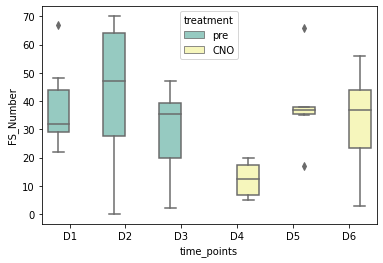

In [ ]:
# In this dataset, there are two independent variables (time and treatment) and number of FS
# is a dependent variable

# generate a boxplot to see the data distribution by time points. Using boxplot, we can 
# boxplot helps detect the differences between different time points and find any outliers
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="time_points", y="FS_Number", hue="treatment", data=df, palette="Set3")
plt.show()

Perform two-way repeated measure ANOVA

In [ ]:
# install pingouin as !pip install pingouin
#!pip install pingouin
import pingouin as pg
res = pg.rm_anova(dv='FS_Number', within=['treatment', 'time_points'], subject='Id', 
                  data=df, detailed=True)
res

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,treatment,1369.388889,1,5,1369.388889,7.916051,0.037392,0.037392,0.612885,1.000000
1,time_points,7005.833333,5,25,1401.166667,1.975867,0.117306,0.202601,0.283243,0.312297
2,treatment * time_points,-4872.305556,5,25,-974.461111,2.274063,0.077992,0.077992,0.312626,1.000000


post-hoc test (ttest)

In [ ]:
# install pingouin as !pip install pingouin
# make sure you have installed the pingouin package (pip install pingouin)
post_hocs = pg.pairwise_ttests(dv='FS_Number', within='treatment', parametric = True, subject='Id', padjust='fdr_bh', data=df)

post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,treatment,CNO,pre,True,True,-2.813548,5.0,two-sided,0.037392,2.583,-1.171886


In [ ]:
post_hocs[post_hocs['p-corr']<0.05]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges


In [ ]:
post_hocs[post_hocs['p-unc']<0.05]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,treatment,CNO,pre,True,True,-2.813548,5.0,two-sided,0.037392,2.583,-1.171886


post-hoc (wilcoxon)

In [ ]:
post_hocs = pg.pairwise_ttests(dv='FS_Number', within='time_points', parametric = False, subject='Id', padjust='fdr_bh', data=df)


In [ ]:
post_hocs[post_hocs['p-corr']<0.05]

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,p-corr,p-adjust,hedges


In [ ]:
post_hocs[post_hocs['p-unc']<0.05]

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,p-corr,p-adjust,hedges
2,time_points,D1,D4,True,False,0.0,two-sided,0.03125,0.234375,fdr_bh,1.896998


In [ ]:
# install pingouin as !pip install pingouin
# Mauchly’s test of sphericity
import pingouin as pg
pg.sphericity(data=df, dv='FS_Number', subject='Id', within='treatment')[-1]

1.0

In [ ]:
# install pingouin as !pip install pingouin
pg.normality(data=df, dv='FS_Number', group='treatment')


,W,pval,normal
pre,0.967791,0.755282,True
CNO,0.905803,0.072583,True
